In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10, 5)

#  Load Data from the ipl mathes file
def load_data(file_path):    #file_path is defined next which is actually path for the ipl matches file..
    df = pd.read_csv(file_path)
    if df.empty:   # first checking if file isn't empty if empty error will be raised...
        raise ValueError("Dataset is empty")
    return df.copy()    # making copy of originial data...so when i apply changes the original data won't corrupt..its safety practice

# Clean Data
def clean_data(df):
    df = df.copy()

    # Normalize column names (VERY IMPORTANT)
    df.columns = df.columns.str.strip()

    # Required columns check
    required = ['WinningTeam', 'TossWinner', 'Season', 'Margin']#these columns are required for analysis
    for col in required:
        if col not in df.columns:#If ANY column is missing → stop immediately(there can also be missing columns in the data so we also have to keep in mind)
            raise KeyError(f"Missing column in dataset: {col}")

    # Remove rows where winner or toss winner is missing
    df = df.dropna(subset=['WinningTeam', 'TossWinner'])#You cannot calculate if the toss winner also won the match if either value is missing.so drop that row..

    # Fix Season column like 2020/21 -> 2020
    df.loc[:, 'Season'] = df['Season'].astype(str).str[:4].astype(int)# we need numeric data so first we will convert into string and then to integer for analysis.

    return df

#Features 
def add_features(df):
    df = df.copy()

    # Toss impact(check that toss winning team wins most matches or losing team)
    df['TossWinMatchWin'] = df['TossWinner'] == df['WinningTeam']

    # Toss decision based wins(decide to bat team win more matches or decide to field team)
    df['BatFirstWin'] = (
        (df['TossDecision'] == 'bat') &
        (df['TossWinner'] == df['WinningTeam'])
    )

    df['FieldFirstWin'] = (
        (df['TossDecision'] == 'field') &
        (df['TossWinner'] == df['WinningTeam'])
    )

    # Close matches(close matches data means which teams were too much close to winning whether by batting or fieldin)
    df['CloseMatch'] = df['Margin'] <= 15#(if target was less than 15 and team lost means it was close and had hardluck)

    return df

# Analysis.Calculate probability of winning based on toss decision (bat or field first).
def analyze_toss_strategy(df):
   
    return df.groupby('TossDecision')['TossWinMatchWin'].mean()
#See how toss impact changes over seasons.
def analyze_toss_trend(df):
   
    return df.groupby('Season')['TossWinMatchWin'].mean()
#Find top teams that perform well in close matches.Returns top N teams by number of wins in close games.
def analyze_close_matches(df, top_n=6):
    return (
        df[df['CloseMatch']]
        ['WinningTeam']
        .value_counts()
        .head(top_n)
    )

# Plotting using simple matplotlib.Simple bar chart and line charts to show trends.

def plot_bar(data, title, xlabel, ylabel):
    
    plt.figure()
    data.plot(kind='bar')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

def plot_line(x, y, title, xlabel, ylabel):
   
    plt.figure()
    plt.plot(x, y, marker='o')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()

#  File Path 
file_path = r"C:\Users\User\Downloads\ipl-matches.csv"

# ------------------ Run Pipeline 
df = load_data(file_path)
df = clean_data(df)
df = add_features(df)

# Show first 5 rows of all the data after we made columns of TossWinMatchWin , BatFirstWin , FieldFirstWin , CloseMatch
df.head()


,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,...,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,TossWinMatchWin,BatFirstWin,FieldFirstWin,CloseMatch
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon,False,False,False,True
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,...,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon,True,False,True,True
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,...,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough,False,False,False,True
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,...,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma,True,False,True,True
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,...,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan,False,False,False,True


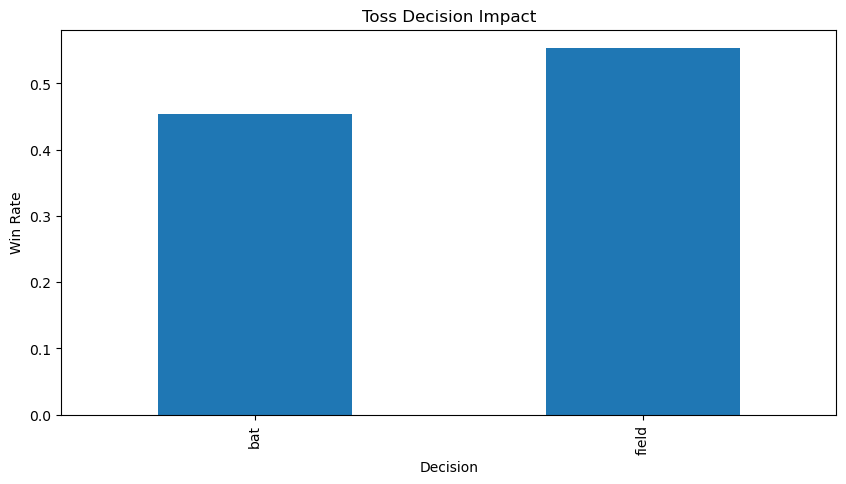

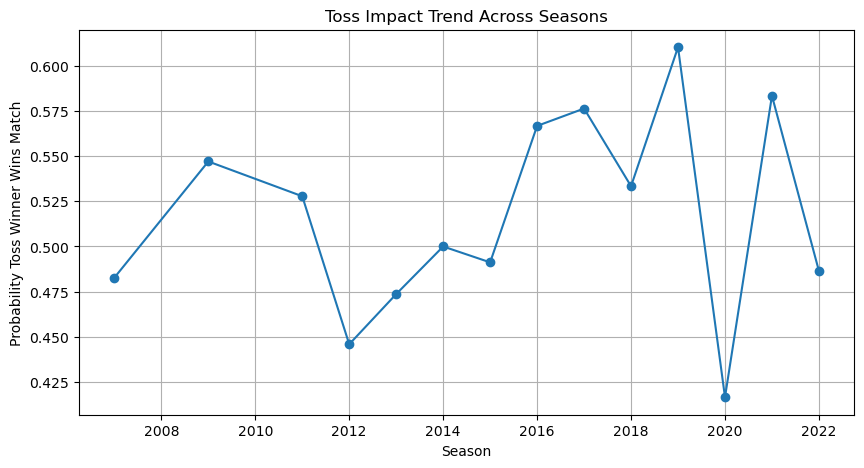

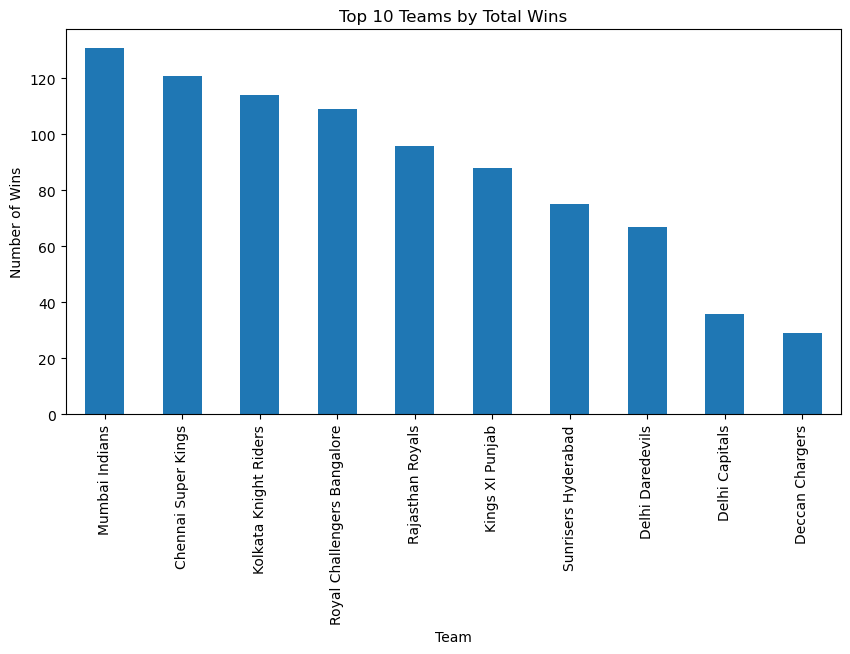

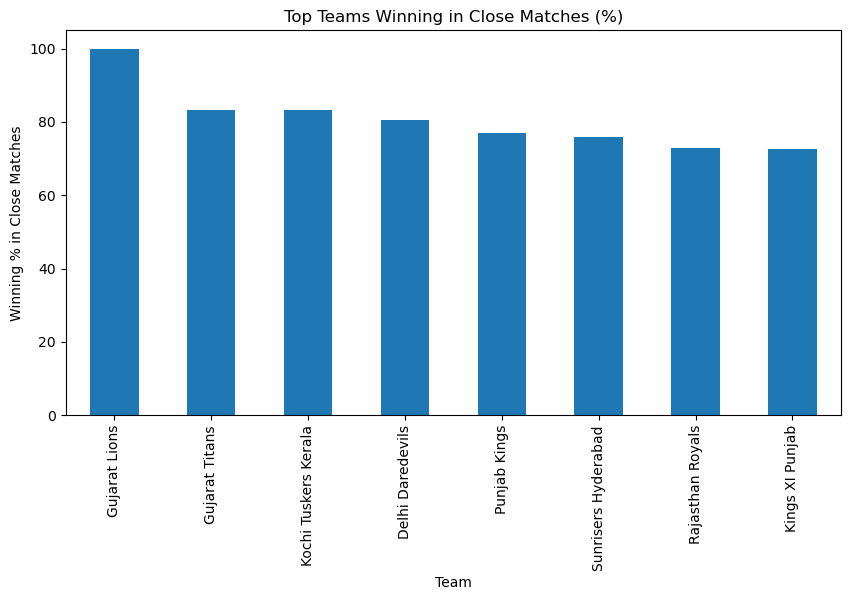

In [111]:
toss = analyze_toss_strategy(df)
plot_bar(toss, "Toss Decision Impact", "Decision", "Win Rate")
#showing toss strategy if chose to bat wins most or field.

toss_trend = analyze_toss_trend(df)
plot_line(toss_trend.index, toss_trend.values,
          "Toss Impact Trend Across Seasons",
          "Season",
          "Probability Toss Winner Wins Match")
#  Total Wins by Teams
plot_bar(df['WinningTeam'].value_counts().head(10),
         "Top 10 Teams by Total Wins",
         "Team",
         "Number of Wins")
#Close Matches Winning Percentage by Team means which team has most hardluck
close_percent = (df[df['CloseMatch']]['WinningTeam'].value_counts() /
                 df['WinningTeam'].value_counts() * 100).dropna().sort_values(ascending=False).head(8)
plot_bar(close_percent,
         "Top Teams Winning in Close Matches (%)",
         "Team",
         "Winning % in Close Matches")


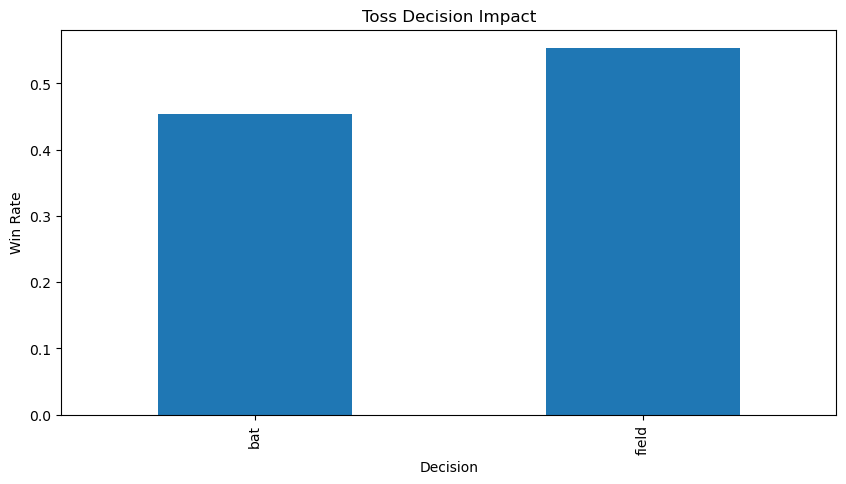

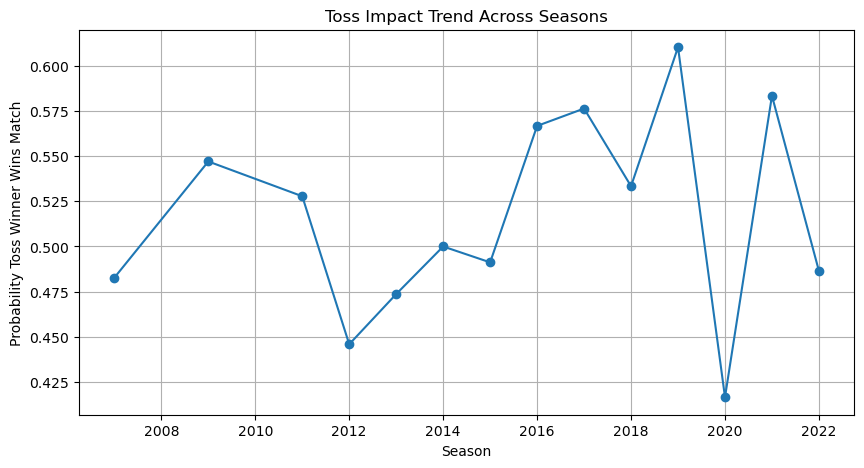

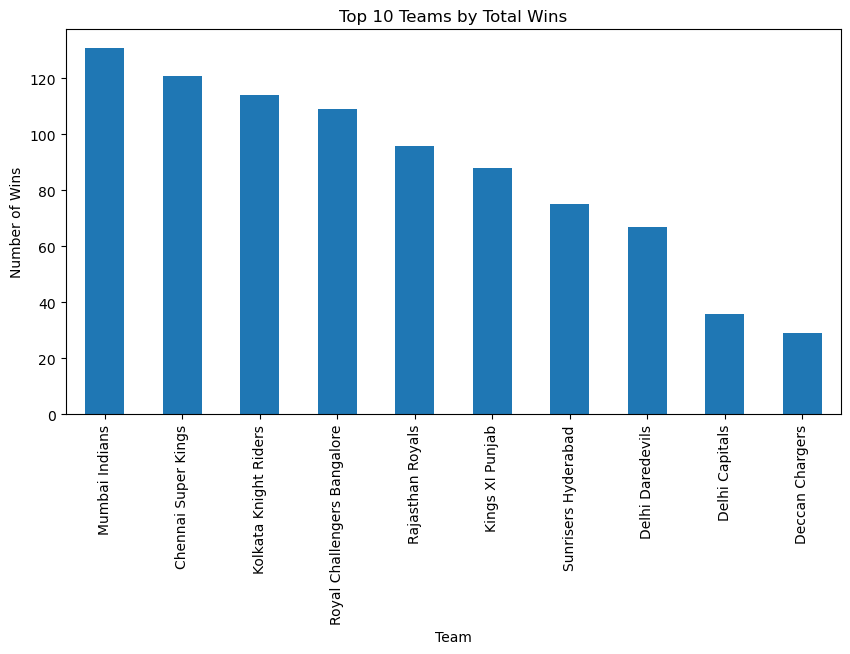

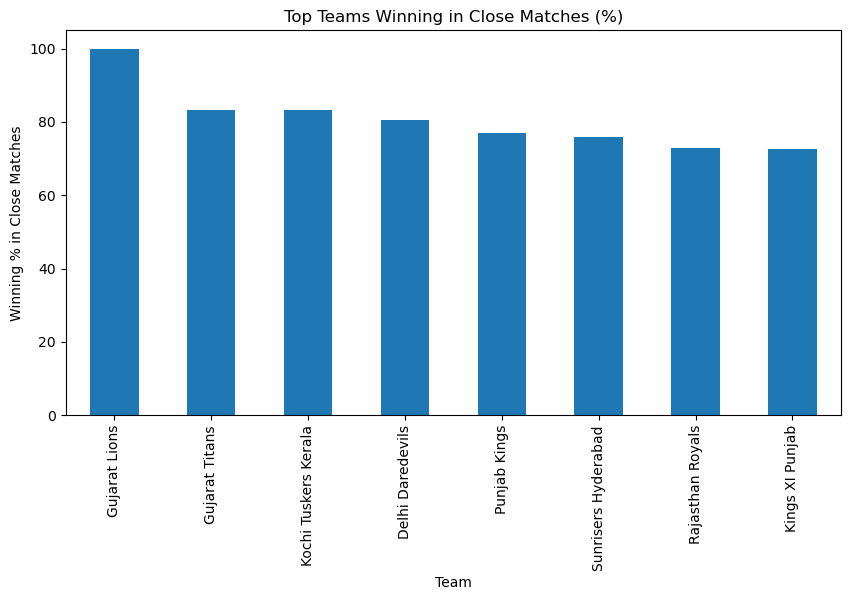

In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10, 5)

#  Load Data from the ipl mathes file
def load_data(file_path):    #file_path is defined next which is actually path for the ipl matches file..
    df = pd.read_csv(file_path)
    if df.empty:   # first checking if file isn't empty if empty error will be raised...
        raise ValueError("Dataset is empty")
    return df.copy()    # making copy of originial data...so when i apply changes the original data won't corrupt..its safety practice

# Clean Data
def clean_data(df):
    df = df.copy()

    # Normalize column names (VERY IMPORTANT)
    df.columns = df.columns.str.strip()

    # Required columns check
    required = ['WinningTeam', 'TossWinner', 'Season', 'Margin']#these columns are required for analysis
    for col in required:
        if col not in df.columns:#If ANY column is missing → stop immediately(there can also be missing columns in the data so we also have to keep in mind)
            raise KeyError(f"Missing column in dataset: {col}")

    # Remove rows where winner or toss winner is missing
    df = df.dropna(subset=['WinningTeam', 'TossWinner'])#You cannot calculate if the toss winner also won the match if either value is missing.so drop that row..

    # Fix Season column like 2020/21 -> 2020
    df.loc[:, 'Season'] = df['Season'].astype(str).str[:4].astype(int)# we need numeric data so first we will convert into string and then to integer for analysis.

    return df

#Features 
def add_features(df):
    df = df.copy()

    # Toss impact(check that toss winning team wins most matches or losing team)
    df['TossWinMatchWin'] = df['TossWinner'] == df['WinningTeam']

    # Toss decision based wins(decide to bat team win more matches or decide to field team)
    df['BatFirstWin'] = (
        (df['TossDecision'] == 'bat') &
        (df['TossWinner'] == df['WinningTeam'])
    )

    df['FieldFirstWin'] = (
        (df['TossDecision'] == 'field') &
        (df['TossWinner'] == df['WinningTeam'])
    )

    # Close matches(close matches data means which teams were too much close to winning whether by batting or fieldin)
    df['CloseMatch'] = df['Margin'] <= 15#(if target was less than 15 and team lost means it was close and had hardluck)

    return df

# Analysis.Calculate probability of winning based on toss decision (bat or field first).
def analyze_toss_strategy(df):
   
    return df.groupby('TossDecision')['TossWinMatchWin'].mean()
#See how toss impact changes over seasons.
def analyze_toss_trend(df):
   
    return df.groupby('Season')['TossWinMatchWin'].mean()
#Find top teams that perform well in close matches.Returns top N teams by number of wins in close games.
def analyze_close_matches(df, top_n=6):
    return (
        df[df['CloseMatch']]
        ['WinningTeam']
        .value_counts()
        .head(top_n)
    )

# Plotting using simple matplotlib.Simple bar chart and line charts to show trends.

def plot_bar(data, title, xlabel, ylabel):
    
    plt.figure()
    data.plot(kind='bar')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

def plot_line(x, y, title, xlabel, ylabel):
   
    plt.figure()
    plt.plot(x, y, marker='o')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()

#  File Path 
file_path = r"C:\Users\User\Downloads\ipl-matches.csv"

# ------------------ Run Pipeline 
df = load_data(file_path)
df = clean_data(df)
df = add_features(df)

# Show first 5 rows of all the data after we made columns of TossWinMatchWin , BatFirstWin , FieldFirstWin , CloseMatch
df.head()


toss = analyze_toss_strategy(df)
plot_bar(toss, "Toss Decision Impact", "Decision", "Win Rate")
#showing toss strategy if chose to bat wins most or field.

toss_trend = analyze_toss_trend(df)
plot_line(toss_trend.index, toss_trend.values,
          "Toss Impact Trend Across Seasons",
          "Season",
          "Probability Toss Winner Wins Match")
#  Total Wins by Teams
plot_bar(df['WinningTeam'].value_counts().head(10),
         "Top 10 Teams by Total Wins",
         "Team",
         "Number of Wins")
#Close Matches Winning Percentage by Team means which team has most hardluck
close_percent = (df[df['CloseMatch']]['WinningTeam'].value_counts() /
                 df['WinningTeam'].value_counts() * 100).dropna().sort_values(ascending=False).head(8)
plot_bar(close_percent,
         "Top Teams Winning in Close Matches (%)",
         "Team",
         "Winning % in Close Matches")

